## Histogram of the image values

In [1]:
import celestializer as cl
import numpy as np

In [2]:
files = cl.list_observations()
df = cl.raw_to_df(files)
df[df.filepath.str.contains("2025-01-28")]

,filepath,width,height,focal_length,aperture,shutter,iso,timestamp,camera,bit_depth
14,calibration/2025-01-28/IMG_3391.CR2,5202,3465,32.0,4.5,0.006250,6400,2025-01-28 22:15:37,Canon EOS 1200D,14
15,calibration/2025-01-28/IMG_3392.CR2,5202,3465,32.0,4.5,0.008000,6400,2025-01-28 22:15:44,Canon EOS 1200D,14
16,calibration/2025-01-28/IMG_3393.CR2,5202,3465,32.0,4.5,0.010000,6400,2025-01-28 22:15:51,Canon EOS 1200D,14
17,calibration/2025-01-28/IMG_3394.CR2,5202,3465,32.0,4.5,0.010000,6400,2025-01-28 22:17:46,Canon EOS 1200D,14
18,calibration/2025-01-28/IMG_3396.CR2,5202,3465,32.0,4.5,0.006250,6400,2025-01-28 22:18:05,Canon EOS 1200D,14
19,calibration/2025-01-28/IMG_3397.CR2,5202,3465,32.0,4.5,0.005000,6400,2025-01-28 22:18:14,Canon EOS 1200D,14
20,calibration/2025-01-28/IMG_3398.CR2,5202,3465,32.0,4.5,0.004000,6400,2025-01-28 22:20:47,Canon EOS 1200D,14
21,calibration/2025-01-28/IMG_3399.CR2,5202,3465,32.0,4.5,0.003125,6400,2025-01-28 22:20:58,Canon EOS 1200D,14
22,calibration/2025-01-28/IMG_3400.CR2,5202,3465,32.0,4.5,0.002500,6400,2025-01-28 22:21:07,Canon EOS 1200D,14
23,calibration/2025-01-28/IMG_3401.CR2,5202,3465,32.0,4.5,0.002000,6400,2025-01-28 22:21:16,Canon EOS 1200D,14


In [3]:
subdf = df[df.filepath.str.contains("2025-01-28")]
imgs = [cl.RawImage(cl.Paths.data / f).load() for f in subdf.filepath]

/home/marco/git/stellar-statistics/.venv/lib/python3.12/site-packages/rawkit/raw.py:268: UserWarning: The image is flipped.
  warnings.warn(


100%|██████████| 6/6 [00:01<00:00,  3.79it/s]


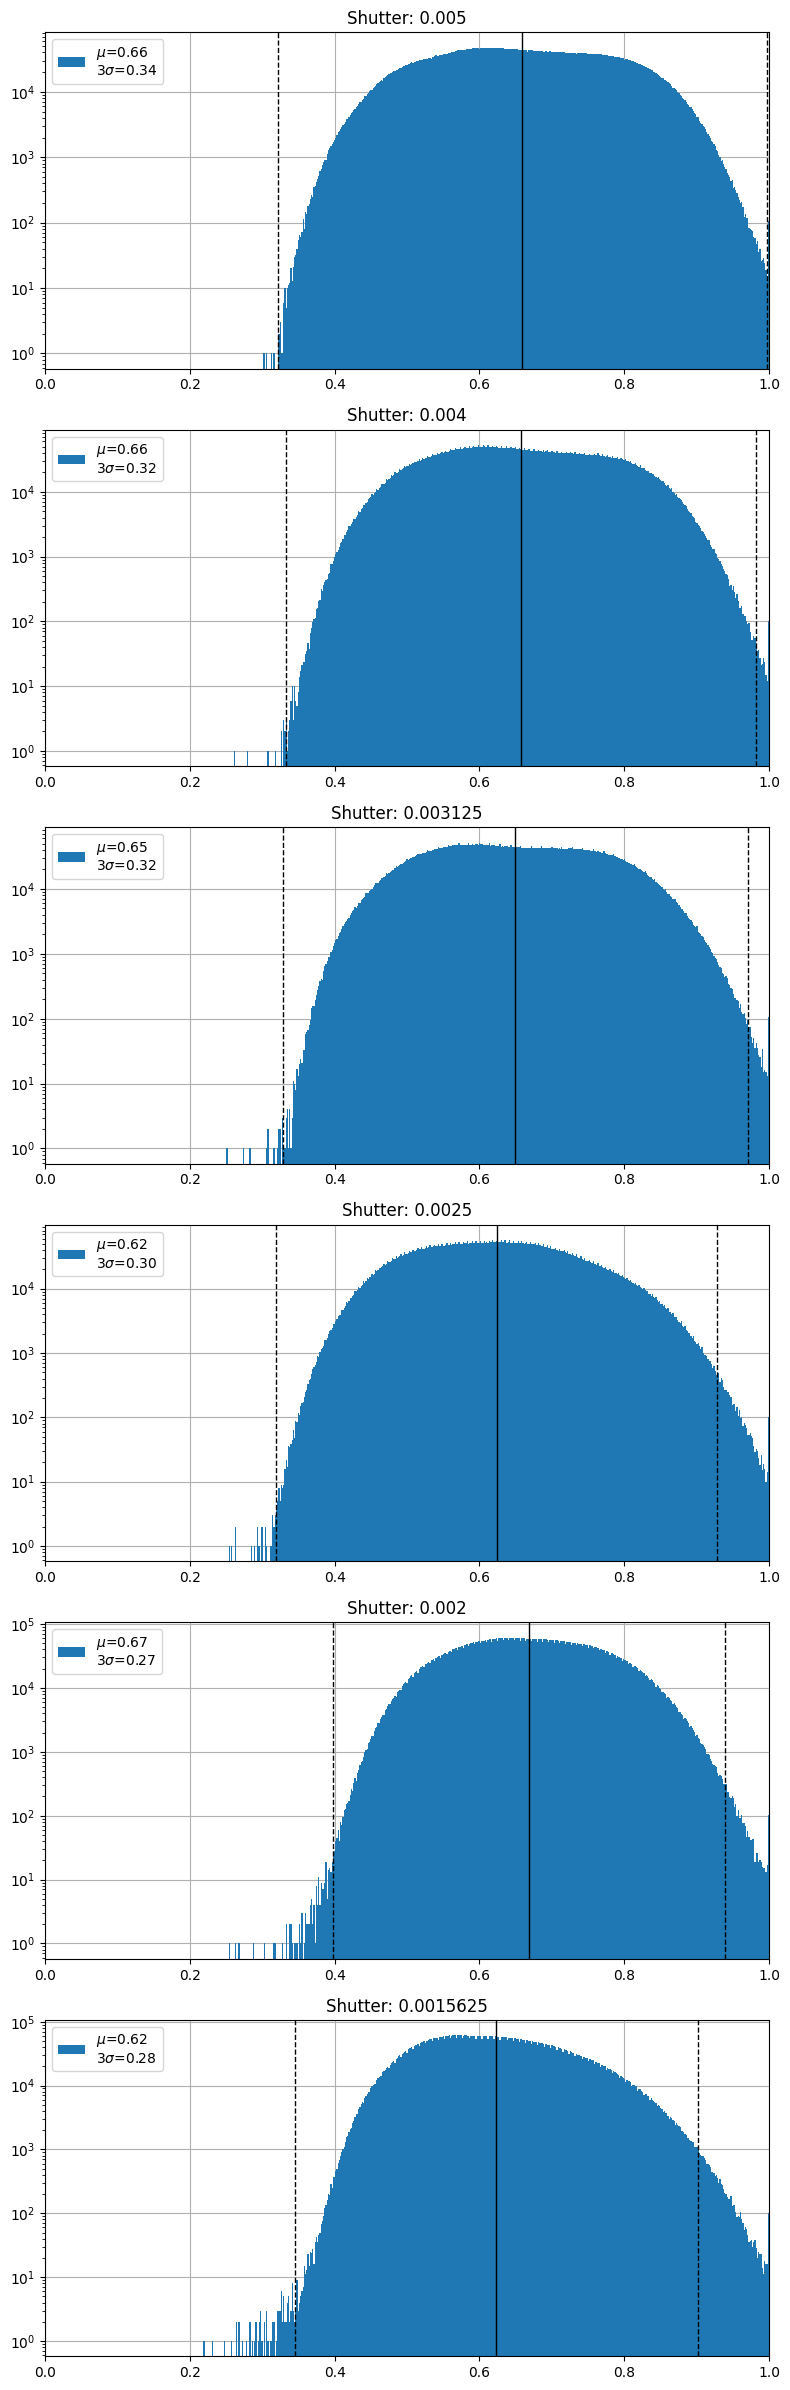

In [4]:
imgs_plot = dict()
for img in imgs:
    img_green = img.raw().channel("green")
    mean = np.nanmean(img_green)
    std = np.nanstd(img_green)
    max_val = np.nanmax(img_green)
    # Check if too many pixels are saturated
    if max_val < mean + 3 * std:
        continue
    assert img_green.bit_depth == 1, "Image must have values in [0, 1]"
    img_green = (img_green / np.nanpercentile(img_green, 99.999)).clip(0, 1)
    imgs_plot[img.metadata.shutter] = img_green

subplot_funcs = [
    [cl.pixel_histogram(img, title=f"Shutter: {shutter}")]
    for shutter, img in imgs_plot.items()
]
fig = cl.subplots_grid(subplot_funcs, figsize=(8, 4 * len(imgs_plot)))
fig.savefig(
    cl.Paths.saved / "histograms_vignette.png", dpi=300, bbox_inches="tight"
)
display(fig)

In [3]:
img_sky = cl.RawImage(cl.Paths.observations / "2024-11-05/IMG_3320.CR2").load()
img_white = cl.RawImage(cl.Paths.calibration / "2025-01-28/IMG_3397.CR2").load()

/home/marco/git/stellar-statistics/.venv/lib/python3.12/site-packages/rawkit/raw.py:268: UserWarning: The image is flipped.
  warnings.warn(


Original image


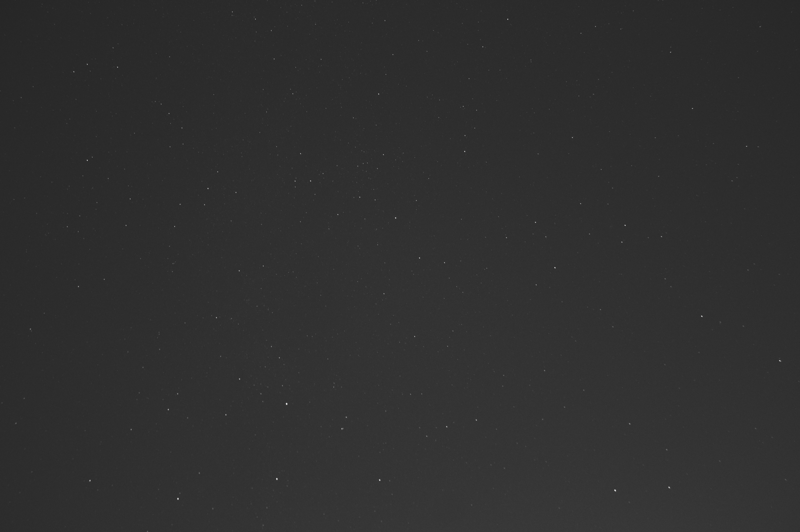

Corrected image


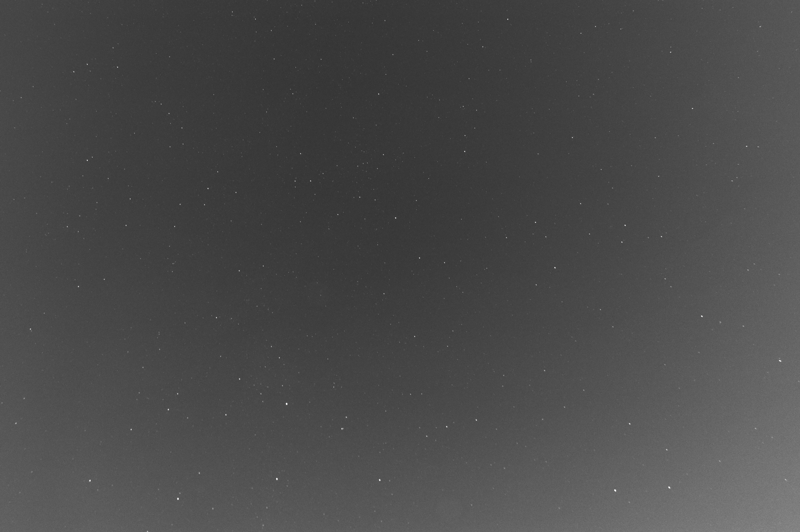

Vignette image


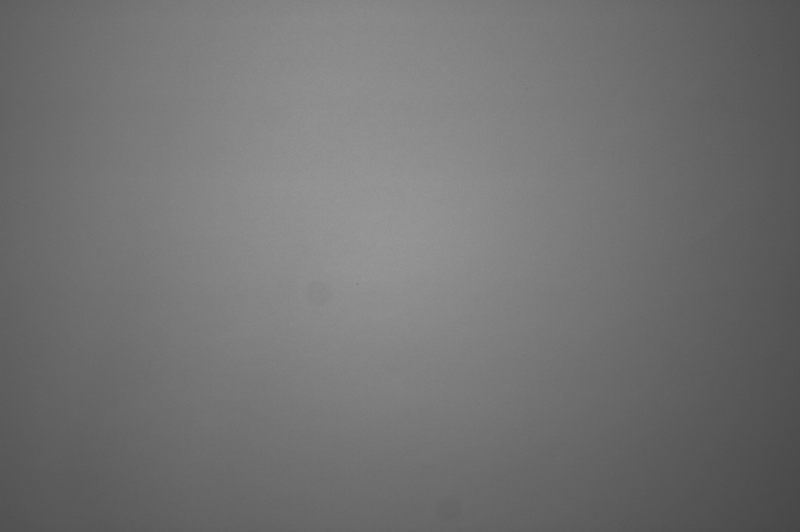

In [5]:
img = img_sky.raw().channel("green")
img_vignette = img_white.raw()
img_corrected = cl.correct_vignetting(img, img_vignette)
img_original = img.green_interpolated()
img_corrected = img_corrected.green_interpolated()
print("Original image")
img_original.preview().show()
print("Corrected image")
img_corrected.preview().show()
print("Vignette image")
img_vignette.preview().show()